In [6]:
import os
import warnings

import numpy as np
from himalaya.backend import set_backend, get_backend
from himalaya.ridge import Ridge
from matplotlib import pyplot as plt
from sklearn import config_context
from sklearn.model_selection import ValidationCurveDisplay, LearningCurveDisplay

from compare_variance_residual.simulation import generate_dataset

In [7]:
set_backend("cupy", on_error='throw')
backend = get_backend()
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["SCIPY_ARRAY_API"] = "1"

In [11]:
feature_space_dimensions = [
    100,  # shared
    100,  # unique 0
    100,  # unique 1
]
scalars = [
    1 / 3, 1 / 3, 1 / 3
]
n_targets = 1
n_samples_train = 10000
n_samples_test = 1000
n_samples = n_samples_train + n_samples_test
noise_scalar = 0.1

In [12]:
cv = 20
alphas = np.logspace(-12, 12, 50)
param_name = "alpha"
param_range = alphas

In [13]:
Xs, Y = generate_dataset(feature_space_dimensions, scalars, n_targets, n_samples, noise_scalar)

Split targets into single targets, creating a 3d array with targets along the first dimension, then samples, then the single target

In [14]:
Ys = [backend.asarray(Y[:, i]).reshape(-1, 1) for i in range(n_targets)]
Ys[0].shape

(11000, 1)

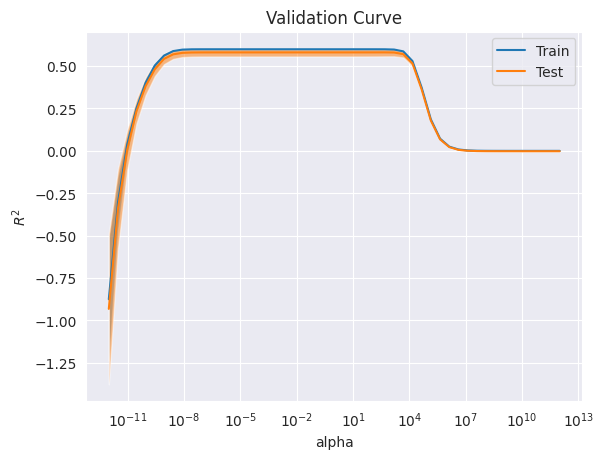

In [18]:
fig, ax = plt.subplots()
ax.set_title("Validation Curve")
with config_context(array_api_dispatch=True):
    ValidationCurveDisplay.from_estimator(
        Ridge(), Xs[0][:n_samples_train], Ys[0][:n_samples_train], param_name=param_name, param_range=param_range,
        score_name=r"$R^2$", cv=cv, ax=ax
    )

/home/leo/PycharmProjects/compare_variance_residual/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 10.
  warnings.warn(


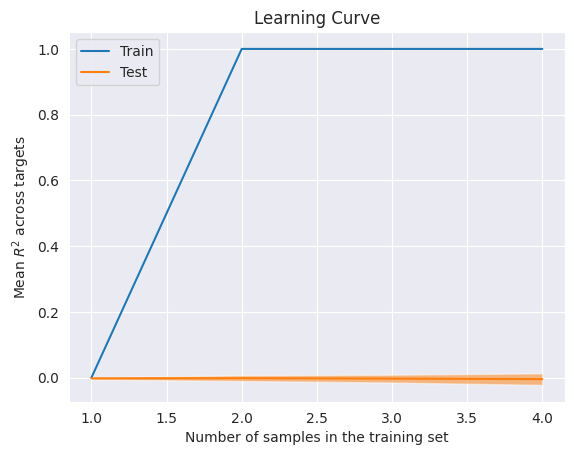

In [19]:
_, ax = plt.subplots()
ax.set_title("Learning Curve")
with config_context(array_api_dispatch=True):
    LearningCurveDisplay.from_estimator(
        Ridge(), Xs[0][:n_samples_train], Ys[0][:n_samples_train], cv=cv,
        train_sizes=[int(num) for num in np.logspace(0, np.log(len(Xs)), 10)],
        score_name=f"$R^2$", ax=ax
    )